# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = 'tk.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.366532
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.309893
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.173925
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.420216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
365,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.823909
366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.823909
367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.366532


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
365,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      5.000000
1      8.366532
2      7.309893
3      6.173925
4      6.420216
         ...   
364    6.397940
365    6.823909
366    6.823909
367    8.366532
368    8.096910
Name: pIC50, Length: 369, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,...,PubchemFP702,PubchemFP710,PubchemFP712,PubchemFP713,PubchemFP734,PubchemFP776,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP821
0,0,0,0,1,0,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0
1,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
365,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
366,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
367,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
X.to_csv('tk_descriptor_list.csv', index = False)

In [54]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8776501979851545

## Model Prediction

In [12]:
Y_pred = model.predict(X)
Y_pred

array([6.07647963, 7.69457624, 6.77036428, 6.335501  , 7.51050323,
       6.7433783 , 6.27914301, 6.27914301, 6.20697649, 4.97781992,
       6.40818776, 6.7433783 , 7.20012132, 6.73021418, 7.1049074 ,
       7.26626769, 7.179661  , 7.35327364, 7.19695813, 6.42382979,
       6.80694994, 6.88773041, 7.29316796, 6.74495607, 7.573933  ,
       7.52757905, 7.36644986, 7.573933  , 7.27505107, 7.40768599,
       7.40768599, 6.2354152 , 7.29316796, 6.98154474, 7.29316796,
       7.05566833, 6.80694994, 7.573933  , 7.573933  , 6.78081576,
       6.2354152 , 4.71752643, 4.65493729, 4.75373725, 4.64583819,
       4.87960358, 6.23606983, 5.61024288, 6.65512622, 6.71056579,
       7.12735965, 5.28635481, 6.88847536, 6.88847536, 7.00463913,
       6.88847536, 6.36552922, 6.73885614, 5.42805371, 7.24746365,
       6.46350776, 7.24746365, 6.73413182, 7.5115467 , 7.12735965,
       8.0202698 , 6.28598475, 7.17819385, 6.74372469, 5.80233859,
       5.1154381 , 4.77815612, 4.61073109, 6.73538853, 6.01470

## Model Performance

In [13]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.17
Coefficient of determination (R^2): 0.88


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

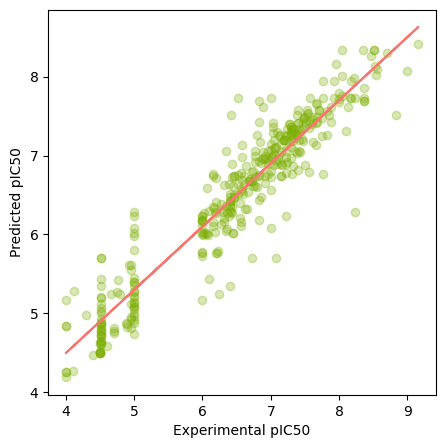

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [16]:
import pickle

In [17]:
pickle.dump(model, open('tyrosinekinase.pkl', 'wb'))